## Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.applications import InceptionV3
from glob import glob

## Loading Data

In [11]:
train_path = "train"
test_path = "test"
validation_path = "val"

## Vısualization

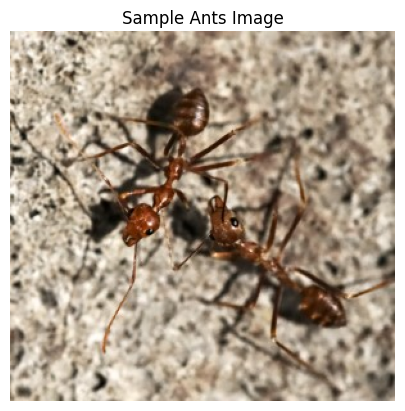

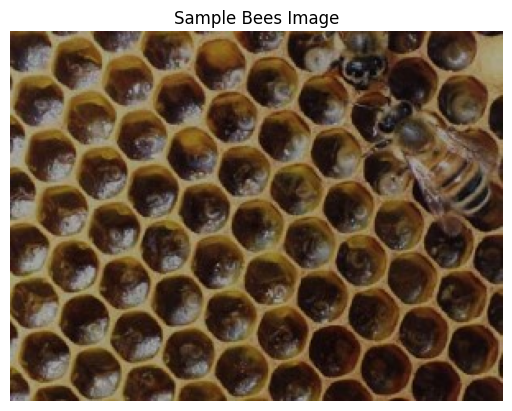

In [12]:
img = load_img(train_path + "/ants/ants (1).jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Ants Image")
plt.show()

plt.figure()

img = load_img(train_path + "/bees/bees (1).jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Bees Image")
plt.show()

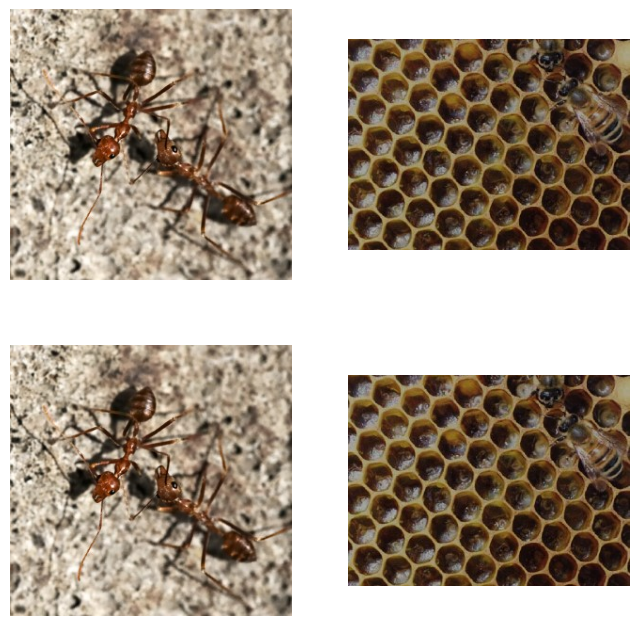

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(load_img(train_path + "/ants/ants (1).jpg"))
axs[0,0].axis("off")

axs[0,1].imshow(load_img(train_path + "/bees/bees (1).jpg"))
axs[0,1].axis("off")

axs[1,0].imshow(load_img(train_path + "/ants/ants (1).jpg"))                        
axs[1,0].axis("off")

axs[1,1].imshow(load_img(train_path + "/bees/bees (1).jpg"))
axs[1,1].axis("off")

plt.show()

## Data Processing

In [14]:
className = glob(train_path + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 12


In [15]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

## Data Augmentation

In [16]:
batch_size = 256
train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 2986 images belonging to 12 classes.
Found 308 images belonging to 12 classes.


## InceptionV3 Model

In [17]:
IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (224,224,3))

87910968/87910968 [==============================] - 60s 1us/step


In [18]:
model = Sequential()

model.add(IncV3)
    
for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

model.add(Dense(units = 2048, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = NumberofClass, activation = "softmax"))


## Compiling the Model

In [19]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## Fitting

In [20]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 5,
                    batch_size = batch_size)
                    

Epoch 1/5
12/12 [==============================] - 147s 12s/step - loss: 39.3112 - accuracy: 0.4819 - val_loss: 5.0460 - val_accuracy: 0.8247
Epoch 2/5
12/12 [==============================] - 147s 12s/step - loss: 7.3223 - accuracy: 0.7388 - val_loss: 2.0729 - val_accuracy: 0.8636
Epoch 3/5
12/12 [==============================] - 164s 14s/step - loss: 2.0320 - accuracy: 0.8248 - val_loss: 0.7249 - val_accuracy: 0.8799
Epoch 4/5
12/12 [==============================] - 168s 14s/step - loss: 0.7152 - accuracy: 0.8289 - val_loss: 0.3058 - val_accuracy: 0.8766
Epoch 5/5
12/12 [==============================] - 185s 15s/step - loss: 0.5348 - accuracy: 0.8389 - val_loss: 0.2613 - val_accuracy: 0.9026


## Evaluating the Model

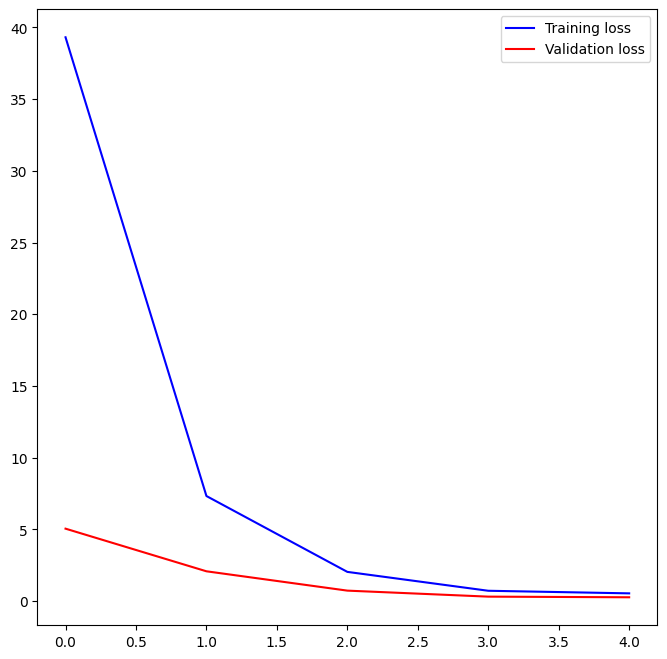

<Figure size 640x480 with 0 Axes>

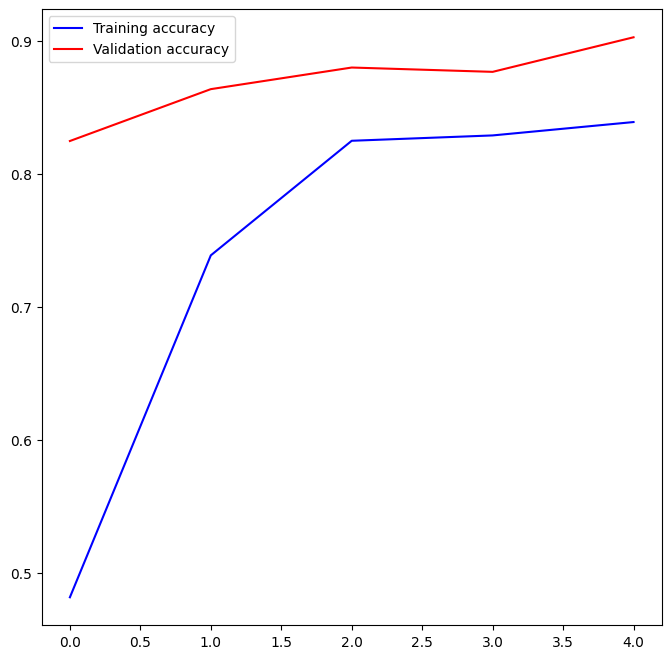

In [21]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()

In [22]:
model.save('pest.h5')

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
